In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

### plot f1 score and accuracy

In [4]:
opts = ["GA", "RHC", "SA", "BP"]
params = {"GA": "pop=100, mate=50, mutate=5",
          "RHC": "try=3",
          "SA": "t=100, cooling=0.75",
          "BP": "try=4"
         }
validf1 = {}
validacc = {}
testf1 = {}
testacc = {}
trainf1 = {}
trainacc = {}
for opt in opts:
    flat = "flat.%s" % (opt.lower())
    df = pd.read_csv(flat, header=0)
    validf1[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "valid")].f1.item()
    validacc[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "valid")].accuracy.item()
    testf1[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "test")].f1.item()
    testacc[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "test")].accuracy.item()
    trainf1[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "train")].f1.item()
    trainacc[opt] = df.loc[(df["params"] == params[opt]) & (df["tag"] == "train")].accuracy.item()


In [11]:
    def plot_valid_vs_test(xlabels, vals, legends, ylim, ylabel, figname):
        width = 0.8
        n = len(vals)
        _X = np.arange(len(xlabels))
        for i in range(n):
            plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                        width=width/float(n), align="edge")   
            plt.xticks(_X, xlabels)
        plt.ylim(ylim[0], ylim[1])
        plt.ylabel(ylabel)
        plt.legend(legends)
        plt.title("Train vs Test Performance: "+ylabel)
        plt.savefig(figname)
        plt.show()
        plt.close()

In [6]:
    def setup_plot_2bar(data1, data2, legends, ylim, ylabel, filename):
        width=0.8
        vals = []

        xlabels = sorted(data1.keys())
        val1 = []
        for xl in xlabels:
            val1.append(data1[xl])
        val2 = []
        for xl in xlabels:
            val2.append(data2[xl])
        vals = [val1, val2]
        plot_valid_vs_test(xlabels, vals, legends, ylim, ylabel, filename)

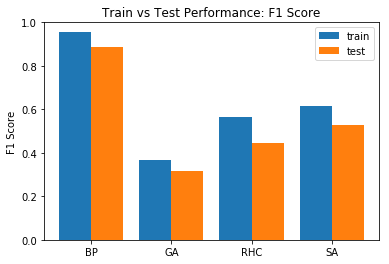

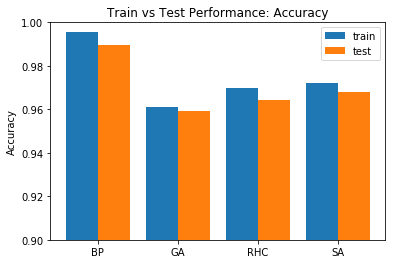

In [12]:
setup_plot_2bar(trainf1, testf1, ['train','test'], [0, 1.], 'F1 Score', 'ccf1.png')
setup_plot_2bar(trainacc, testacc, ['train','test'], [0.9, 1.], 'Accuracy', 'ccaccuracy.png')

In [8]:
trainf1

{'BP': 0.954887218,
 'GA': 0.36578171090000006,
 'RHC': 0.5670103093,
 'SA': 0.6134663342}

In [9]:
testf1

{'BP': 0.8859649123000001,
 'GA': 0.3150684932,
 'RHC': 0.4430379747,
 'SA': 0.5269461078000001}

In [10]:
trainacc

{'BP': 0.9956639566,
 'GA': 0.9611562781999999,
 'RHC': 0.9696476965,
 'SA': 0.9719963866}